# ***Penguins Descriptive Analysis and Statistical Relationship***

# **Importing Libraries**

In [1]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install google-colab

Here we install the necessay libraries

# **Importing Libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We important pandas, seaborn which we use mainly

### ***Generate Random SEED and RandomState***

In [ ]:
# Generate random SEED
np.random.seed(2023)
SEED = (int) ((np.random.rand()) * (14+8))
STATE = np.random.mtrand.RandomState(SEED)
print(SEED)
print(STATE)

7
RandomState(MT19937)


The random state and seed

### ***Load the data from local repository***

In [ ]:
# load the required data
PATH = './data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv'))
data.head()

We load the data based trom the local repositories if working locally

### ***Load data from Google Drive***

In [ ]:
# load data from  google drive
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv')) # change path to your path
data.head()

Mounted at /content/drive


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We load the data, from a mounted google drive,
To automate the process.

### ***Data Preprocessing, Cleaning and Validation***

In this section, we do the following as accorded in the instructions
- Data validation
- Data Preprocessing
- Data Cleaning

##### *Data Type Check*

In [ ]:
# data type check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


We check what the data has to show, the columns and data types we shall  be working with

##### *Check for missing values*

In [ ]:
# check for missing values
data.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

The data contains some missing values, as it suggested by the this function.

##### Check for repeated values

In [ ]:
# check for repeated values
data.duplicated().sum()

0

The data has unique values since there are no duplicates.

##### *Extract numerical columns*

In [ ]:
# list numeric columns
numericals =['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

numericals

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

##### *Extract categorical columns*

In [ ]:
# list categorical columns
categorical = ['sex', 'island', 'species']
categorical

['sex', 'island', 'species']

##### *Check for outliers*

In [ ]:
# check for outliers
data[numericals].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


We calculate some descriptive statistics for the numerical columns and so it suggess rhat the data is relatively normally distributed since the mean and median are not relatively too spread out.

In [ ]:
data[numericals].skew()

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

Looking at the skewness values, this suggest that the numeric variables are not very highu skewed. Which concluded that data assumes a relatively normal distribution.

##### *Check for data distribution for numerical variables*

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

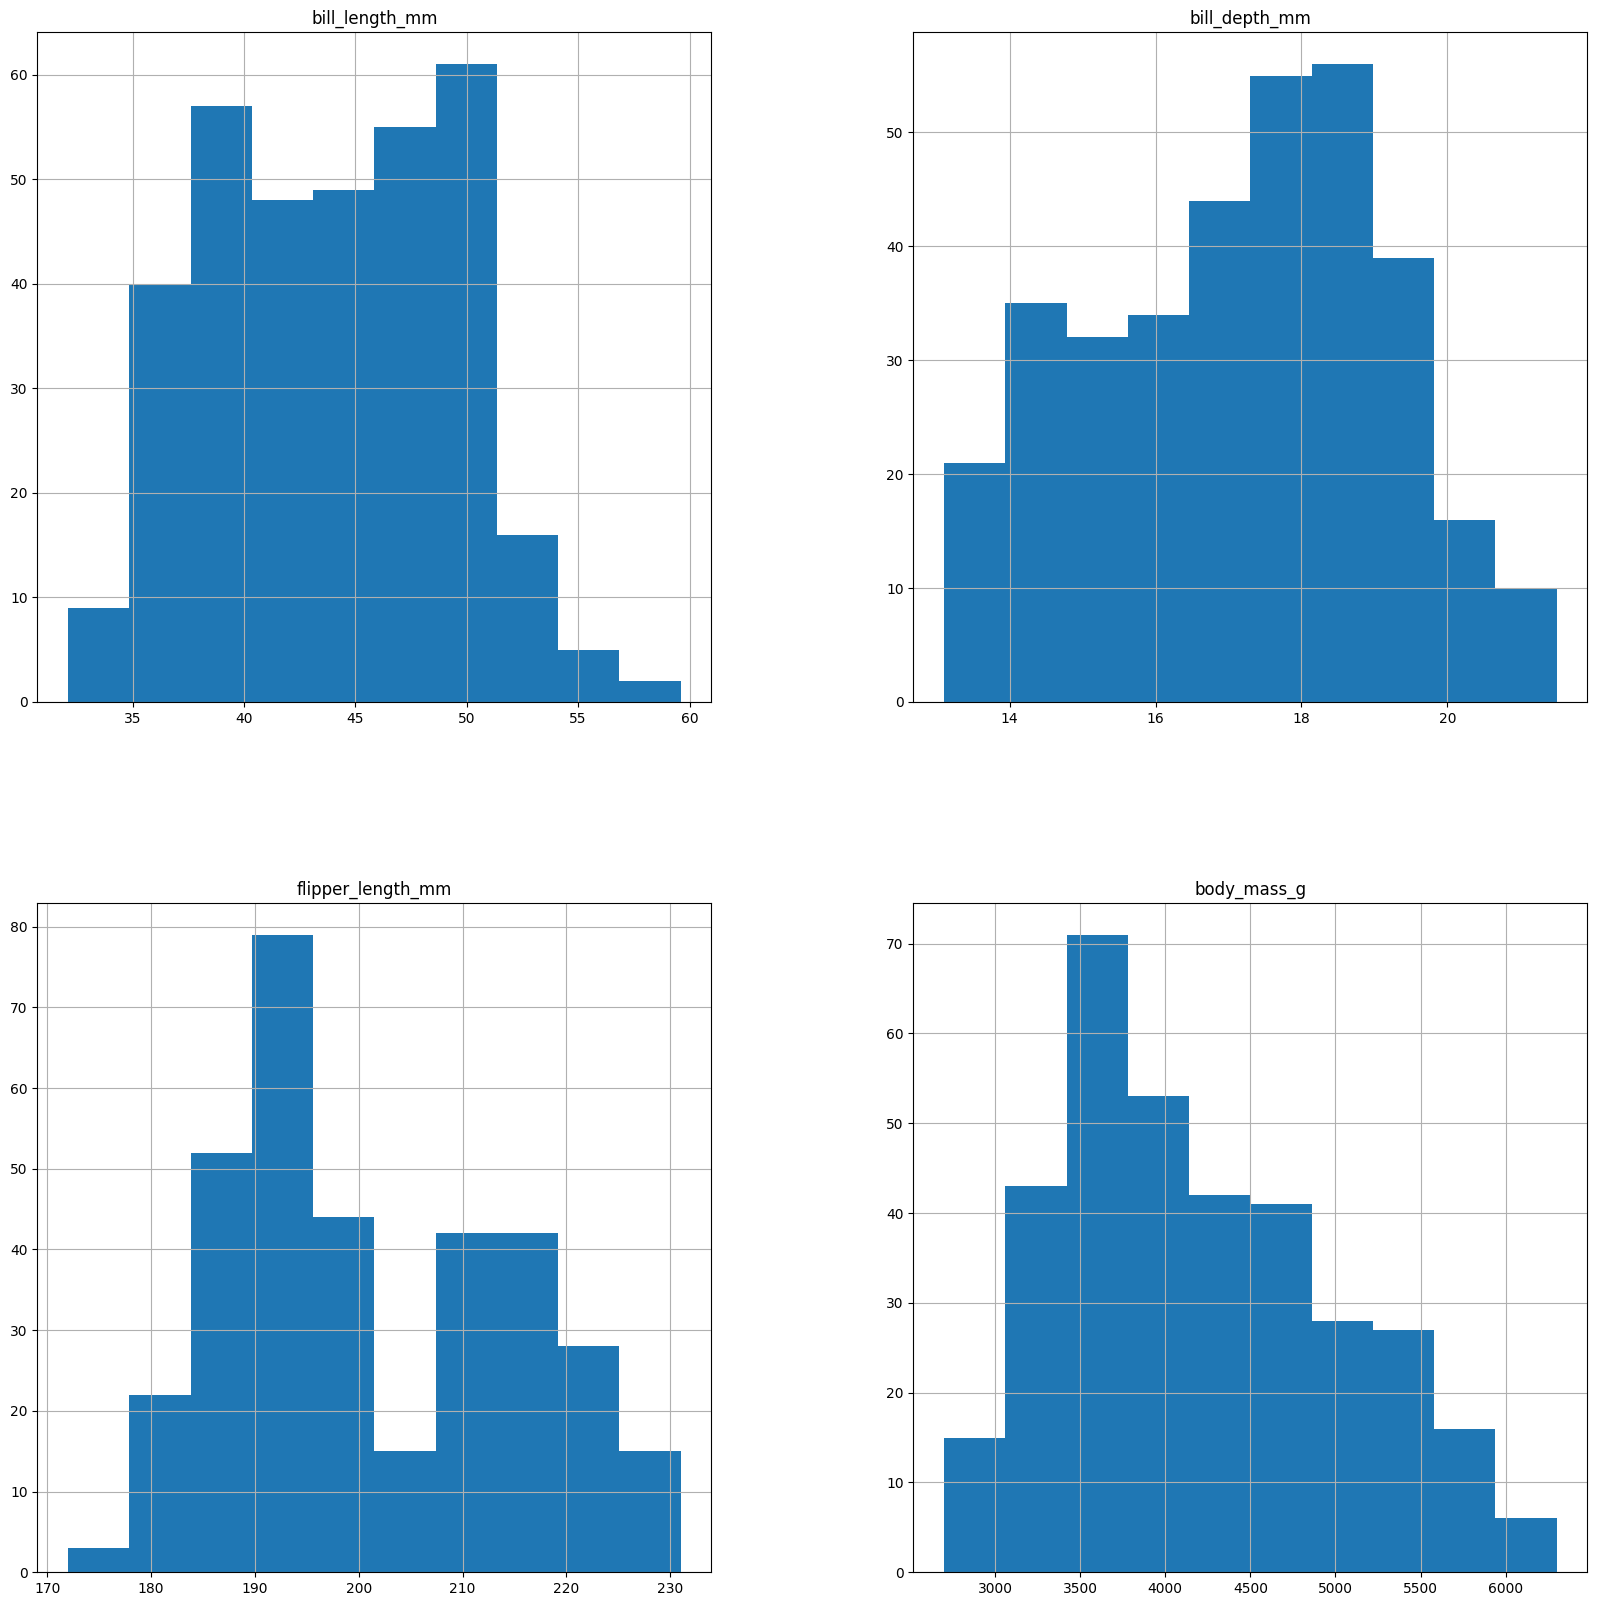

In [ ]:
# check for data distribution for numerical variables
data[numericals].hist(figsize=(20,20))

Visual confirmation from the histogram plots of the numerial vaiables seems to suggest the same, that the distributions tend to trace out a relatively normal distribution curve.

##### *Check for correlation between variables*

In [ ]:
# check for correlation between variables
data[numericals].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


We now investigate the linear relationships between the numeric variable and the Pearson coefficients suggest an existance of  relationships which is either positive like of body mass and fipper length and negative like bill length and bill depth.

<Axes: >

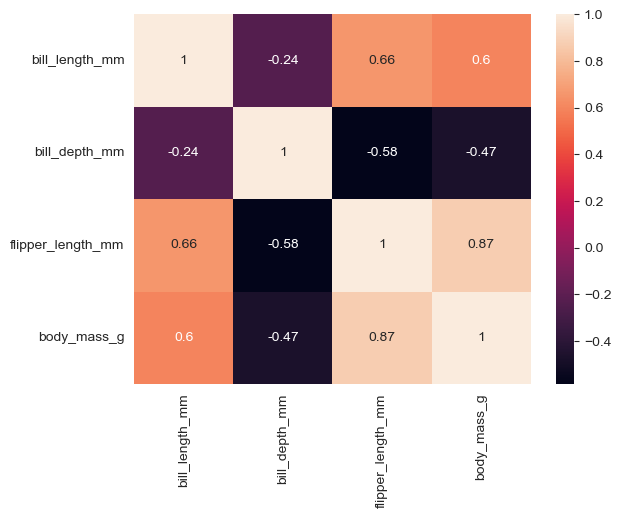

In [ ]:
sns.heatmap(data[numericals].corr(), annot=True)

We plot a heatmap for the correlations to show the strength.

##### *Check for multicollinearity*

<Axes: >

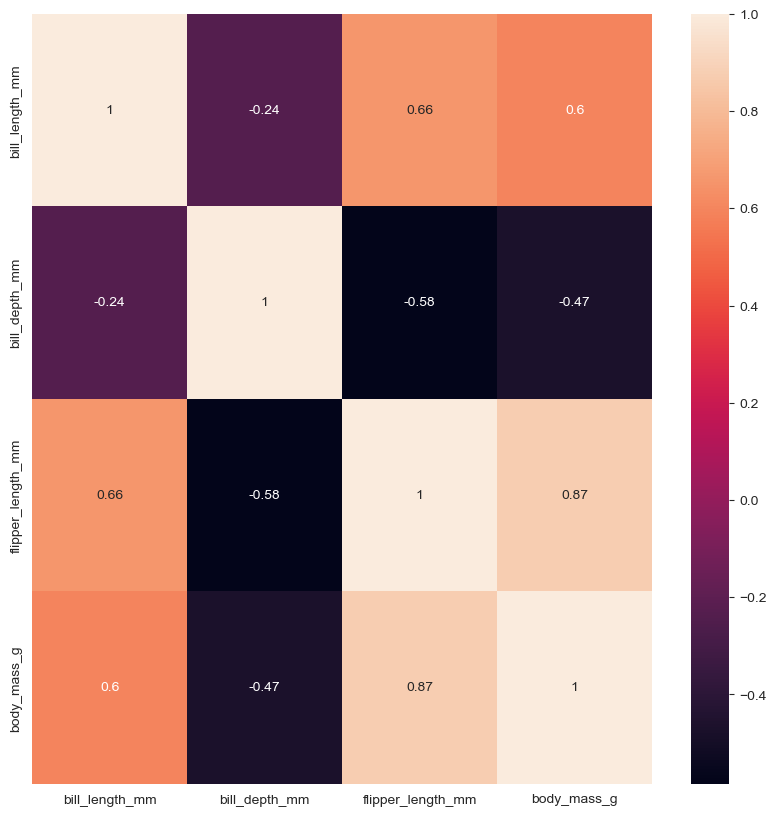

In [ ]:
# check for multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(data[numericals].corr(), annot=True)

The heatmap plot for the correlations suggests
an even distribution, of both negative and positive relationships among the variables.

##### *Check for Counts for Categorical variables*

In [ ]:
# check for counts for categorical variables
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

male      168
female    165
Name: sex, dtype: int64


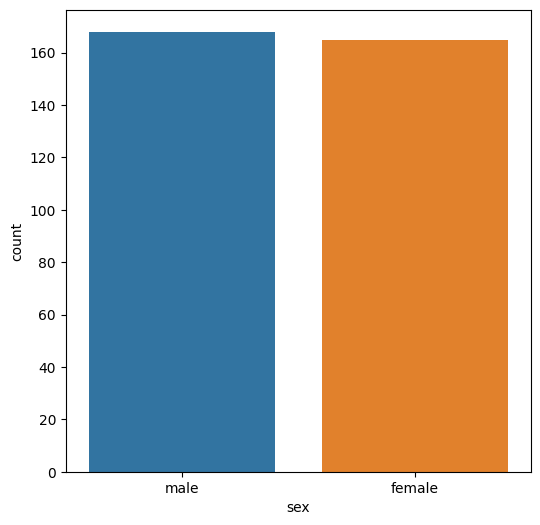

In [ ]:
# sex
categorical_valcount_hist(categorical[0])

Distribution of the sex variable suggest that the males are slightly morethan the females.

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


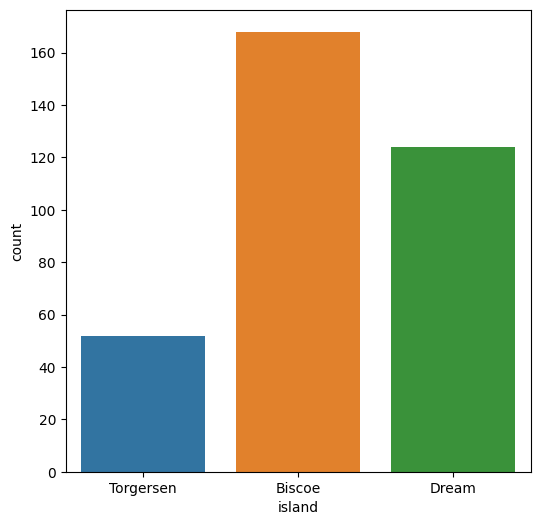

In [ ]:
# island
categorical_valcount_hist(categorical[1])

From the categorical tabulation, it sgguests that the Biscoe is place for most penguins which is followed by dream island.

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


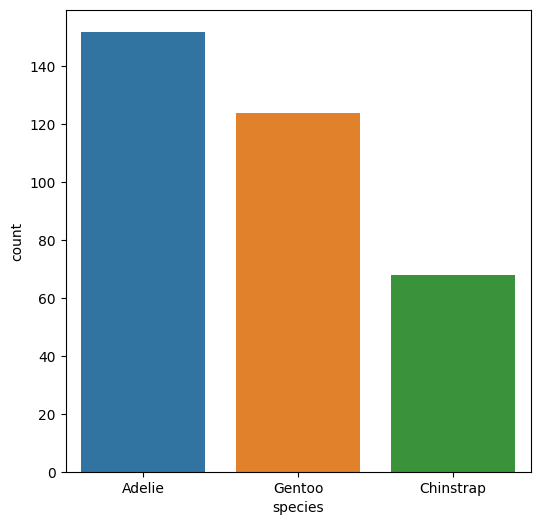

In [ ]:
# species
categorical_valcount_hist(categorical[2])

Looking that the tablaeu adelie species makes the majority of the Penguins, followed by the Gentoo.